## 1. Introduction: What are Convolutions?

In this codelab, you'll learn about convolutions and why they are so powerful in Computer vision scenarios. It will equip you to be ready for [Lab 4]() which shows you have to use convolutions in deep learning scenarios to make convolutional neural networks.

In the [last lab](), you saw how to train an image classifier for fashion items using the Fashion MNIST dataset. This gave you a pretty accurate classifier, but there was an obvious constraint: the images were 28x28 gray scale and the item was centered in the image.

For example here are a couple of the images in Fashion MNIST

<img align="middle" src="image/Fashion.png"/>


The DNN that you created simply learned from the raw pixels what made up a sweater, and what made up a boot in this context. But consider how it might classify this image?

<img align="middle" src="image/Fashion1.jpeg"/>

While it's clear that there are boots in this image, the classifier would fail for a number of reasons. First, of course, it's not 28x28 grayscale, but more importantly, the classifier was trained on the raw pixels of a left-facing boot, and not the features that make up what a boot actually is. To solve this problem, you can use Convolutions.


## 2. Before you begin...
You'll be using TensorFlow to hand build convolutions in this lab.

If you've never done this before, it's strongly recommended that you use Google Colaboratory, a browser-based environment that contains all the required dependencies, including TensorFlow and the required libraries. You can find the code for the rest of this lab running in a colab [here]().

Otherwise, the main language you will use for training models is Python, so you will need to have that installed. In addition to that you'll also need TensorFlow. Details on installing it are [here](). You'll also need the [numpy]()library.


## 3. Using convolutions
A convolution is a filter that passes over an image, processes it, and extracts features that show a commonality in the image. In this lab you'll see how they work, by processing an image to see if you can extract features from it!

The process is very simple. You simply scan every pixel in the image and then look at its neighboring pixels. You multiply out the values of these pixels by the equivalent weights in a filter.

So, for example, consider this:

<img align="middle" src="image/convolutions.png"/>

In this case a 3x3 convolution matrix is specified.

The current pixel value is 192, but you can calculate the new one by looking at the neighbor values, multiplying them out by the values specified in the filter, and making the new pixel value the final amount.

Let's explore how convolutions work by creating a basic convolution on a 2D gray scale image.

We'll demonstrate this with the 'ascent' image from scipy. It's a nice built-in picture with lots of angles and lines.

## 4. Start Coding
Let's start by importing some Python libraries and get the ascent picture.

In [1]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()

Next, we can use the `pyplot` library to draw the image so we know what it looks like.

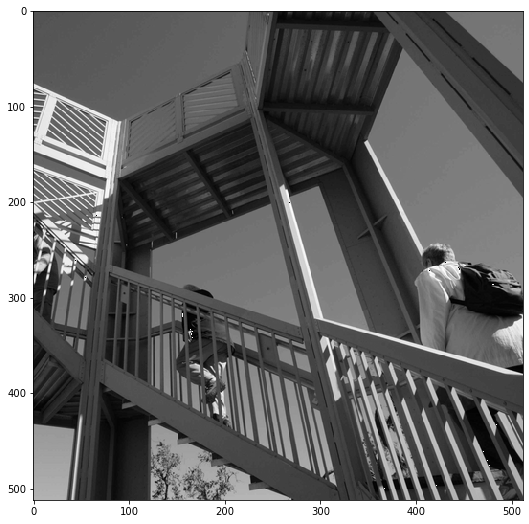

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.grid(False)
plt.gray()
plt.axis('on')
plt.imshow(i)
plt.show()

We can see that this is an image of a stairwell. There are lots of features in here that we can play with seeing if we can isolate them -- for example there are strong vertical lines.

The image is stored as a numpy array, so we can create the transformed image by just copying that array. Let's also get the dimensions of the image so we can loop over it later.

In [14]:
i_transformed = np.copy(i)
i_transformed

array([[ 83,  83,  83, ..., 117, 117, 117],
       [ 82,  82,  83, ..., 117, 117, 117],
       [ 80,  81,  83, ..., 117, 117, 117],
       ...,
       [178, 178, 178, ...,  57,  59,  57],
       [178, 178, 178, ...,  56,  57,  57],
       [178, 178, 178, ...,  57,  57,  58]])

In [11]:
size_x = i_transformed.shape[0]
size_x

512

In [9]:
size_y = i_transformed.shape[1]
size_y

512

## 5. Create the Convolution
First, we make a convolution matrix (or kernel) as a 3x3 array.

In [24]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight lines. 
# Experiment with different values for fun effects.

#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]] 

# A couple more filters to try for fun!

#filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]

filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them

weight  = 1

Now let's calculate the output pixels. We will iterate over the image, leaving a 1 pixel margin, and multiply out each of the neighbors of the current pixel by the value defined in the filter.

That means the current pixel's neighbor above it and to the left will be multiplied by the top left item in the filter etc. etc. We'll then multiply the result by the weight, and then ensure the result is in the range 0-255

Finally we'll load the new value into the transformed image.

In [25]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      output_pixel = 0.0
      output_pixel = output_pixel + (i[x - 1, y-1] * filter[0][0])
      output_pixel = output_pixel + (i[x, y-1] * filter[0][1])
      output_pixel = output_pixel + (i[x + 1, y-1] * filter[0][2])
      output_pixel = output_pixel + (i[x-1, y] * filter[1][0])
      output_pixel = output_pixel + (i[x, y] * filter[1][1])
      output_pixel = output_pixel + (i[x+1, y] * filter[1][2])
      output_pixel = output_pixel + (i[x-1, y+1] * filter[2][0])
      output_pixel = output_pixel + (i[x, y+1] * filter[2][1])
      output_pixel = output_pixel + (i[x+1, y+1] * filter[2][2])
      output_pixel = output_pixel * weight
      if(output_pixel<0):
        output_pixel=0
      if(output_pixel>255):
        output_pixel=255
      i_transformed[x, y] = output_pixel

### 6. Examine the Results
Now we can plot the image to see the effect of passing this filter over it!

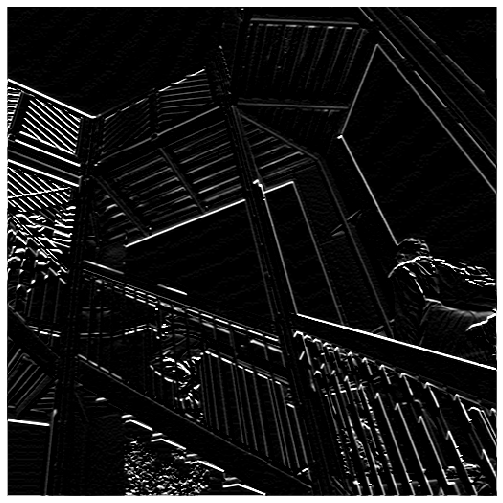

In [26]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.figure(figsize=(16,9))
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
plt.axis('off')
plt.show()   

So, consider the following filter values, and their impact on the image.

Using `[-1,0,1,-2,0,2,-1,0,1]` gives us a very strong set of vertical lines:

<img align="middle" src="image/vertical-line.png"/>

Using [-1,-2,-1,0,0,0,1,2,1] gives us horizontal lines:

<img align="middle" src="image/vl.png"/>

Explore different values for yourself! Also, try different sized filters, such as 5x5 or 7x7.

## 7. Understanding Pooling

As well as using convolutions, pooling helps us greatly in detecting features. The goal is to reduce the overall amount of information in an image while maintaining the features that are detected as present.

There are a number of different types of pooling, but for this lab we'll use one called MAX pooling.

The idea here is to iterate over the image, and consider the pixel and its immediate neighbors to the right, beneath, and right-beneath. Take the largest of these (hence the name MAX pooling) of them and load it into the new image. Thus the new image will be 1/4 the size of the old


<img align="middle" src="image/MAX pooling.png"/>

## 8. Write code for pooling

This code will show a (2, 2) pooling. Run it to see the output, and you'll see that while the image is 1/4 the size of the original while keeping all the features.

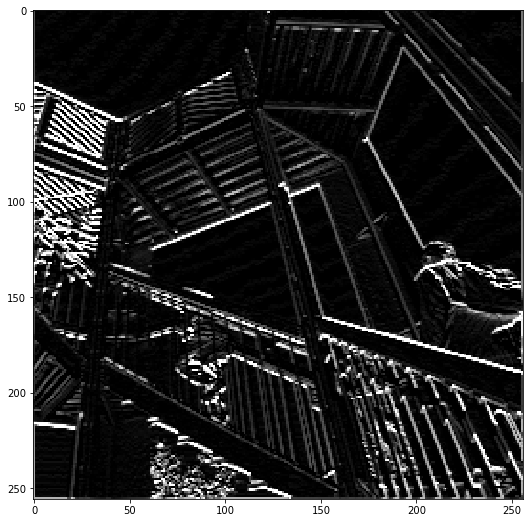

In [37]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    pixels.sort(reverse=True)
    newImage[int(x/2),int(y/2)] = pixels[0]
 
# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.figure(figsize=(16,9))
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()

Note the axes of this plot -- the image is now 256x256, ¼ of it's original size, and the detected features have been enhanced, despite less data now being in the image.

## 9. Next Steps

In the [next lab](https://codelabs.developers.google.com/codelabs/tensorflow-lab4-cnns/#0) you'll see how to add convolutions to your Fashion MNIST neural network to make it more efficient. It will classify based on features, and not on raw pixels.

[Learn Tensorflow 4: Convolutional Neural Networks (CNNs)](https://codelabs.developers.google.com/codelabs/tensorflow-lab4-cnns/#0)